# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [9]:
import sys
!{sys.executable} -m pip install qmsolve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=b4f6763f5d5060c284da1bb83f8958f4903dd3abd9429758f3f1465e816a516e
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar


### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1. In quantum mechanics, a Hamiltonian is a representation of a systems total energy, and is one of the operators used in quantum mechanics 
(Sources:
  http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html ;
 https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_(Cline)/18%3A_The_Transition_to_Quantum_Physics/18.03%3A_Hamiltonian_in_Quantum_Theory)

2. The force law defined in the function <tt>harmonic_oscillator()</tt> is Hooke's Law, as k is being defined with the units eV over Amperes squared. The function then returns the potential energy (of spring), which is then used as an abitray potential to discretize the Hamiltonian.

3. Eigenstates within a dynamic, quantized system is in a state where a deterministic variable is fixed at a value, like a constant, with that set value tied to that particular eigenstate.
(Sources: 
 https://farside.ph.utexas.edu/teaching/qmech/Quantum/node40.html ;
 https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Introductory_Quantum_Mechanics_(Fitzpatrick)/03%3A_Fundamentals_of_Quantum_Mechanics/3.08%3A_Eigenstates_and_Eigenvalues)

4. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.10362100601196289
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


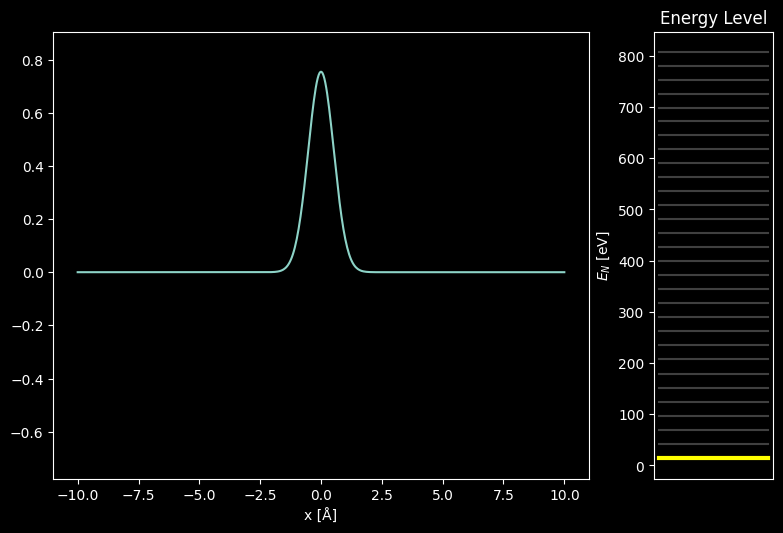

In [14]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.021689414978027344
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


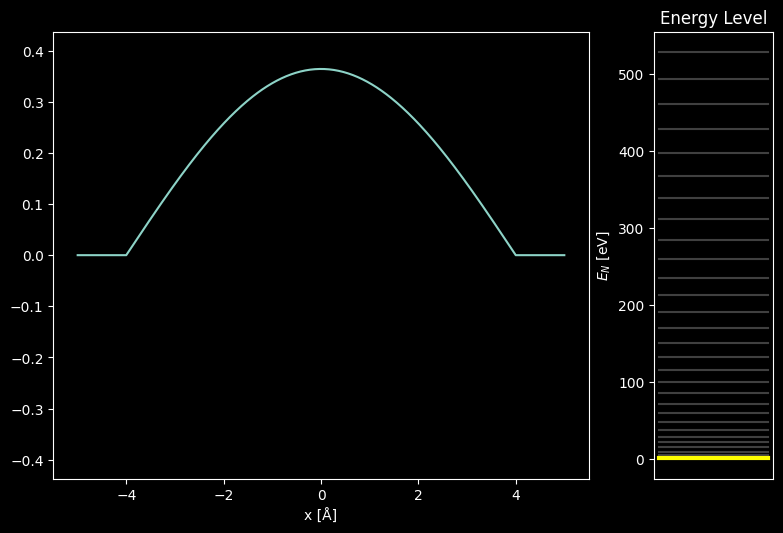

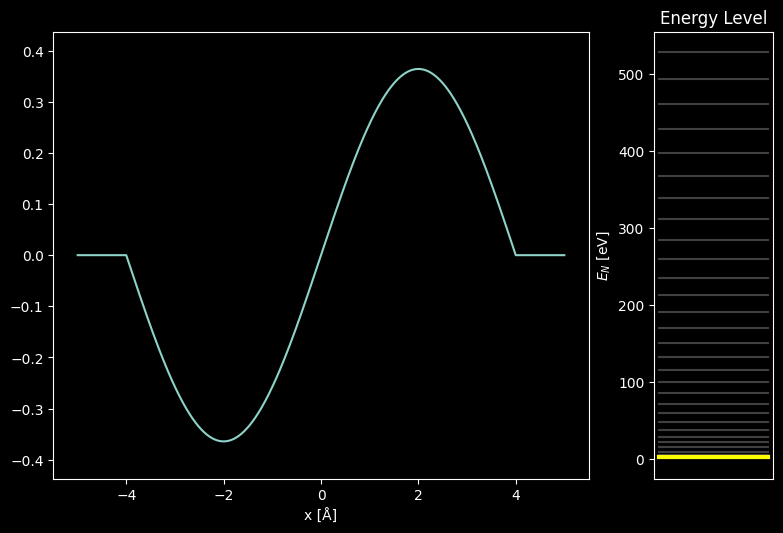

In [15]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

In [6]:
from numpy import linspace, array,zeros,arange,append,nan
from scipy import linalg, tan,sqrt, pi,cos,sin,exp, optimize
import matplotlib.pyplot as plt
from IPython.display import Latex
from ipywidgets import interactive

In [7]:
def U_sq(x, args):
    u=zeros(len(x))
    width = args['width']
    depth = args['depth']
    for i in range(len(x)):
        if x[i]<=-width/2 or x[i]>=width/2:
            u[i]=Vo
    return u

def even_sol(x,theta0):
    y1=tan(x)   
    y=sqrt((theta0/x)**2-1)
    return(y-y1)

def odd_sol(x,theta0):
    y2=-1/tan(x)
    y=sqrt((theta0/x)**2-1)
    return(y-y2)

def sqWellSol(theta0,step):
    esol=array([],dtype=float)
    osol=array([],dtype=float)
    inc=arange(step,theta0,step)
    even=True
            
    for i in range(len(inc)-1):
        if even==True:
            if even_sol(inc[i],theta0)*even_sol(inc[i+1],theta0)<0:                                                    
                esol=append(esol,optimize.brentq(even_sol,inc[i],inc[i+1],args=theta0) ) 
                even=False
        if even==False:
            if odd_sol(inc[i],theta0)*odd_sol(inc[i+1],theta0)<0:
                osol=append(osol,optimize.brentq(odd_sol,inc[i],inc[i+1],args=theta0))
                even=True
    return esol,osol

def even_wave(x,Vo,ek,ekap,L):
    A=Vo/20.
    B=A*(cos(ek*L/2))/exp(-ekap*L/2)
    
    wave=zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2:
            wave[i]=B*exp(ekap*x[i])
        elif x[i]>=L/2:
            wave[i]=B*exp(-ekap*x[i])
        else:
            wave[i]=A*cos(ek*x[i])
    return wave

def odd_wave(x,Vo,ok,okap,L):
    A=Vo/20.
    B=A*(sin(ok*L/2))/exp(-okap*L/2)
    
    wave=zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2:
            wave[i]=B*exp(okap*x[i])
        elif x[i]>=L/2:
            wave[i]=-B*exp(-okap*x[i])
        else:
            wave[i]=-A*sin(ok*x[i])
    return wave

In [9]:
L=10
Vo=1
m=.067

args = {'width': L, 'depth': Vo}
x=linspace(-2*L/2, 2*L/2,400)
U=U_sq(x,args)
theta0=sqrt(m*9.31e-31*Vo*L*L/(2*(6.58e-16)**2*1e18*1.6e-19))

<ipython-input-9-a318c293bd2d>:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  theta0=sqrt(m*9.31e-31*Vo*L*L/(2*(6.58e-16)**2*1e18*1.6e-19))


In [8]:
etheta,otheta=sqWellSol(theta0,.1)


ek=etheta*2./L
ok=otheta*2/L
ekap=2*etheta/L*tan(etheta) 
okap=abs(2*otheta/L*tan(otheta))
e_eng=2*(1.05457173e-34)**2*etheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 #even energy in eV
o_eng=2*(1.05457173e-34)**2*otheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 #odd energy in eV


<ipython-input-7-9eefa83dcab0>:11: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  y1=tan(x)
<ipython-input-7-9eefa83dcab0>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y=sqrt((theta0/x)**2-1)
<ipython-input-7-9eefa83dcab0>:16: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  y2=-1/tan(x)
<ipython-input-7-9eefa83dcab0>:17: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y=sqrt((theta0/x)**2-1)
<ipython-input-8-70c269089700>:6: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  ekap=2*etheta/L*tan(etheta)
<ipython-input-8-70c269089700>:7: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  okap=abs(2*otheta/L*tan(otheta))


<ipython-input-7-9eefa83dcab0>:39: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  B=A*(cos(ek*L/2))/exp(-ekap*L/2)
<ipython-input-7-9eefa83dcab0>:39: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  B=A*(cos(ek*L/2))/exp(-ekap*L/2)
<ipython-input-7-9eefa83dcab0>:44: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  wave[i]=B*exp(ekap*x[i])
<ipython-input-7-9eefa83dcab0>:48: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  wave[i]=A*cos(ek*x[i])
<ipython-input-7-9eefa83dcab0>:46: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  wave[i]=B*exp(-ekap*x[i])
<ipython-input-7-9eefa83dcab0>:53: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  B=A*(sin(ok*L/2))/exp(-oka

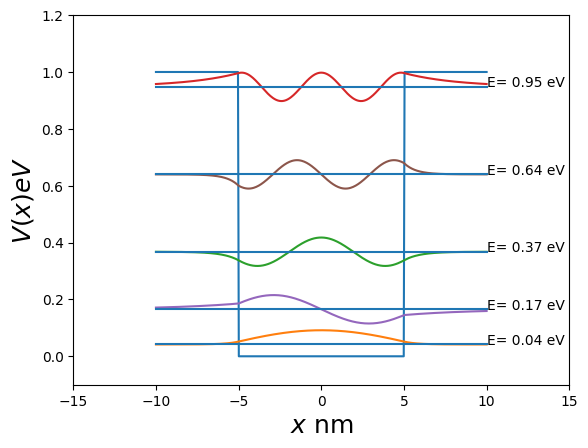

In [10]:
fig, ax=plt.subplots()

ax.plot(x,U)
for i in range(len(ek)):
    ax.plot(x,e_eng[i]+even_wave(x,Vo,ek[i],ekap[i],L))
    ax.axhline(y=e_eng[i],xmin=.1666, xmax=.8333)
    ax.annotate('E= %3.2f eV'%e_eng[i], xy=(x[-1],e_eng[i] ),  xycoords='data')
for i in range(len(ok)):
    ax.plot(x,o_eng[i]+odd_wave(x,Vo,ok[i],okap[i],L))
    ax.axhline(y=o_eng[i],xmin=.1666, xmax=.8333)
    ax.annotate('E= %3.2f eV'%o_eng[i], xy=(x[-1],o_eng[i] ),  xycoords='data')
    
ax.set_ylim(-.1*Vo,Vo*1.2)
ax.set_xlim(-3*L/2,3*L/2)
ax.set_xlabel(r'$x$ nm', fontsize=18)
ax.set_ylabel(r'$V(x) eV $', fontsize=18);
